# CIFAR10 with different CNN architecture
<img src='https://images.prismic.io/encord/52bcd8ad-b25a-4225-ba5d-6b3f6a97e424_CNN+timeline.png?auto=compress,format'>

# **Importing Necessary Libraries**

In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Loading CIFAR-10 dataset**

In [2]:
# Load CIFAR-10 dataset
(train_images, y_train), (test_images, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


# Exploring Dataset

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [3]:
# reshaping train y_train
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
classes =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
num_classes = len(classes)
num_classes

10

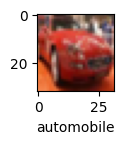

In [6]:
plt.figure(figsize =(1,1))
plt.imshow(train_images[5])
plt.xlabel(classes[y_train[5]])
plt.show()

In [7]:
print(train_images.shape, y_train.shape, test_images.shape, y_test.shape )

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000, 1)


In [8]:
# One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

# **Normalization :**

In [9]:
# Normalize pixel values to the range [0, 1]
X_train = train_images.astype('float32') / 255.0
X_test = test_images.astype('float32') / 255.0

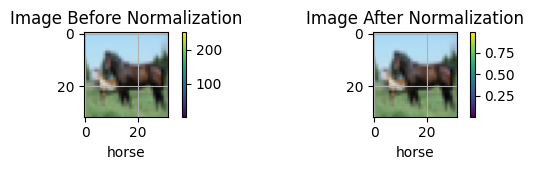

In [10]:
idx = 12
plt.figure(figsize=(6,1.8))
plt.subplot(1, 2, 1)
plt.imshow(train_images[idx])
class_name = classes[y_train[idx]]
plt.xlabel(class_name)
plt.colorbar()
plt.grid(True)
plt.title('Image Before Normalization')

plt.subplot(1,2,2)
plt.imshow(X_train[idx])
class_name = classes[y_train[idx]]
plt.xlabel(class_name)
plt.colorbar()
plt.grid(True)
plt.title('Image After Normalization')
plt.tight_layout()
plt.show()

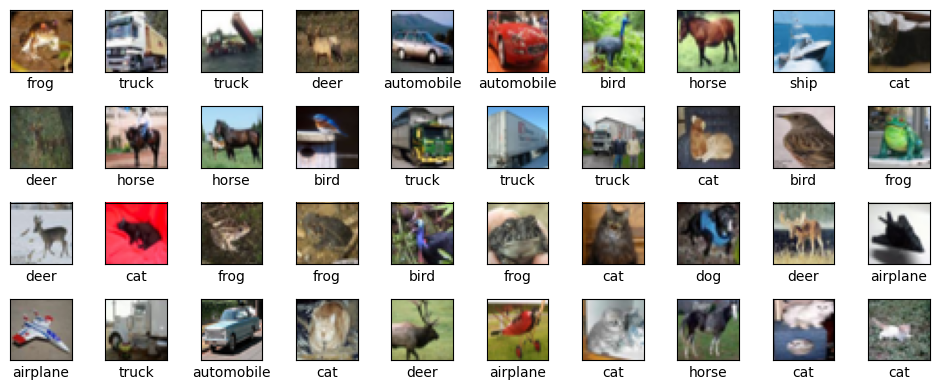

In [ ]:
# Visualising array of pictures
plt.figure(figsize=(10,4))
for i in range(40):
    plt.subplot(4,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])

    class_name = classes[y_train[i]]
    plt.xlabel(class_name)
    plt.tight_layout()
plt.show()

In [ ]:
def image_evaluation(model, classes, X_test, y_test):
    y_pred_model = model.predict(X_test)
    y_pred = np.argmax(y_pred_model, axis=1)

    fig, axes = plt.subplots(5, 8, figsize=(14, 8))
    for i in range(0, 40):
        plt.subplot(5, 8, i + 1)
        plt.imshow(X_test[i])
        class_name_true = classes[y_test.reshape(-1,)[i]]
        class_name_pred = classes[y_pred[i]]
        plt.title(f'True: {class_name_true}\nPredict: {class_name_pred}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# **Custom CNN Model**

In [ ]:
input_shape =(32,32,3)
num_classes =len(classes)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [ ]:
cnn = Sequential([
    Conv2D(32, kernel_size=(5,5),activation = 'relu',input_shape =input_shape),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),

    Conv2D(64, kernel_size =(5,5),padding='same', activation = 'relu'),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation ='relu'),
    Dropout(0.5),
    Dense(128, activation ='relu'),
    Dropout(0.5),
    Dense(num_classes, activation ='softmax')
])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                        

In [ ]:
! pip install visualkeras
import visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 11.6 MB/s eta 0:00:00


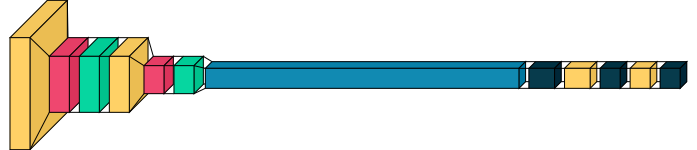

In [ ]:
visualkeras.layered_view(cnn)

In [ ]:
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
cnn.compile(loss=loss, optimizer=optimizer,  metrics=metrics)

In [ ]:
history = cnn.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
782/782 [==============================] - 24s 10ms/step - loss: 1.8072 - accuracy: 0.3663 - val_loss: 1.7018 - val_accuracy: 0.3849
Epoch 2/100
782/782 [==============================] - 5s 7ms/step - loss: 1.3516 - accuracy: 0.5212 - val_loss: 1.3026 - val_accuracy: 0.5520
Epoch 3/100
782/782 [==============================] - 5s 6ms/step - loss: 1.1713 - accuracy: 0.5938 - val_loss: 1.2707 - val_accuracy: 0.5465
Epoch 4/100
782/782 [==============================] - 5s 6ms/step - loss: 1.0381 - accuracy: 0.6418 - val_loss: 0.9746 - val_accuracy: 0.6611
Epoch 5/100
782/782 [==============================] - 5s 6ms/step - loss: 0.9427 - accuracy: 0.6759 - val_loss: 0.9733 - val_accuracy: 0.6628
Epoch 6/100
782/782 [==============================] - 5s 6ms/step - loss: 0.8542 - accuracy: 0.7062 - val_loss: 0.8975 - val_accuracy: 0.6938
Epoch 7/100
782/782 [==============================] - 5s 6ms/step - loss: 0.7852 - accuracy: 0.7334 - val_loss: 1.2085 - val_accuracy: 0.61

<Figure size 300x200 with 0 Axes>

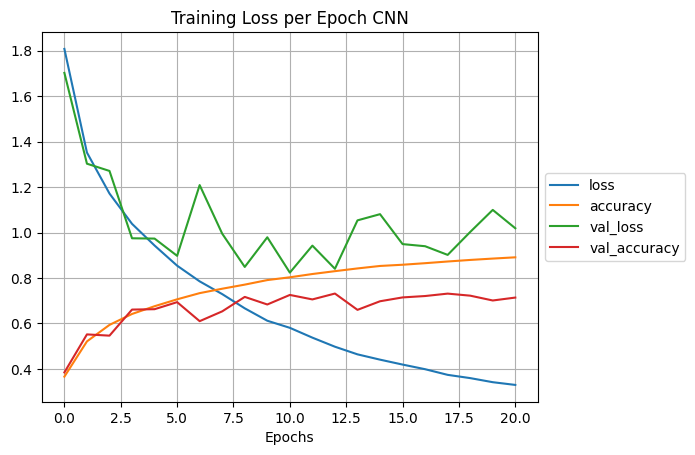

In [ ]:
history_cnn = pd.DataFrame(cnn.history.history)
plt.figure(figsize=(3, 2))
history_cnn.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch CNN')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### **Prediction by the Model**

Image Prediction
313/313 [==============================] - 1s 3ms/step


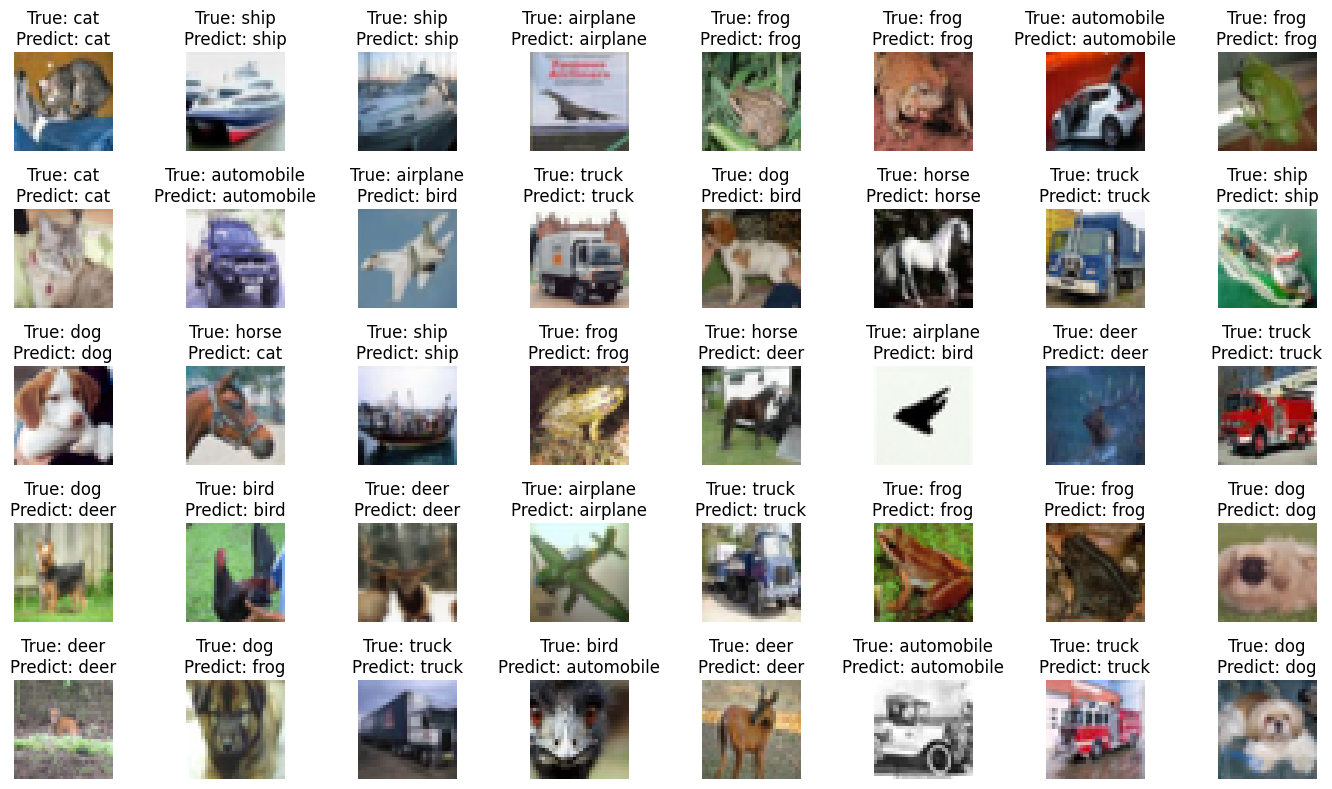

In [ ]:
print("Image Prediction")
image_evaluation(cnn, classes, X_test, y_test)

### **Evaluation of the model**

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0187 - accuracy: 0.7139


[1.0186817646026611, 0.7139000296592712]

# **LeNet - 5**
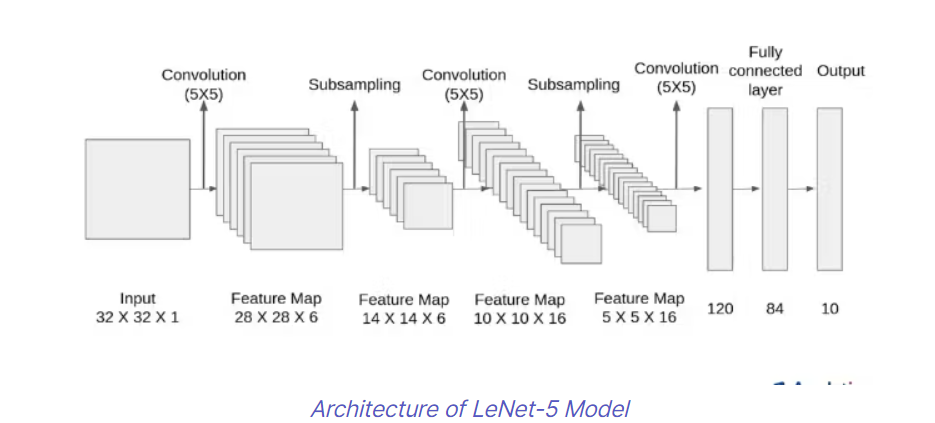

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

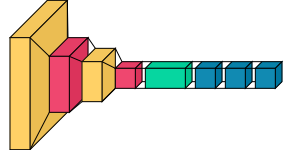

In [ ]:
LeNet5  = Sequential([
    Conv2D(6, kernel_size=(5,5),  strides=1, padding='valid', activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Conv2D(16, kernel_size=(5,5), strides=1, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

# summary
LeNet5.summary()
visualkeras.layered_view(LeNet5)

In [ ]:
LeNet5.compile(loss=loss, optimizer=optimizer,  metrics=metrics)

In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

history = LeNet5.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
782/782 [==============================] - 9s 9ms/step - loss: 1.6870 - accuracy: 0.3791 - val_loss: 1.4460 - val_accuracy: 0.4759
Epoch 2/100
782/782 [==============================] - 8s 10ms/step - loss: 1.4001 - accuracy: 0.4939 - val_loss: 1.4171 - val_accuracy: 0.4941
Epoch 3/100
782/782 [==============================] - 5s 6ms/step - loss: 1.2884 - accuracy: 0.5405 - val_loss: 1.3585 - val_accuracy: 0.5305
Epoch 4/100
782/782 [==============================] - 4s 6ms/step - loss: 1.2182 - accuracy: 0.5671 - val_loss: 1.2395 - val_accuracy: 0.5578
Epoch 5/100
782/782 [==============================] - 4s 5ms/step - loss: 1.1564 - accuracy: 0.5890 - val_loss: 1.1878 - val_accuracy: 0.5806
Epoch 6/100
782/782 [==============================] - 4s 5ms/step - loss: 1.1035 - accuracy: 0.6098 - val_loss: 1.1673 - val_accuracy: 0.5832
Epoch 7/100
782/782 [==============================] - 5s 6ms/step - loss: 1.0572 - accuracy: 0.6268 - val_loss: 1.1483 - val_accuracy: 0.595

<Figure size 300x200 with 0 Axes>

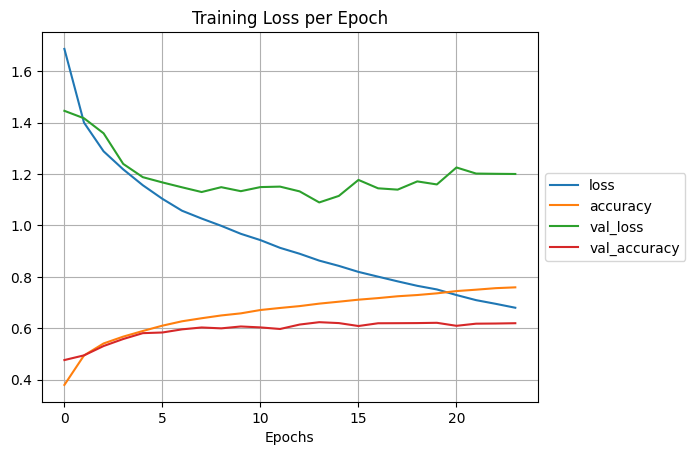

In [ ]:
history_LeNet = pd.DataFrame(LeNet5.history.history)
plt.figure(figsize=(3, 2))
history_LeNet.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Image Prediction
313/313 [==============================] - 1s 3ms/step


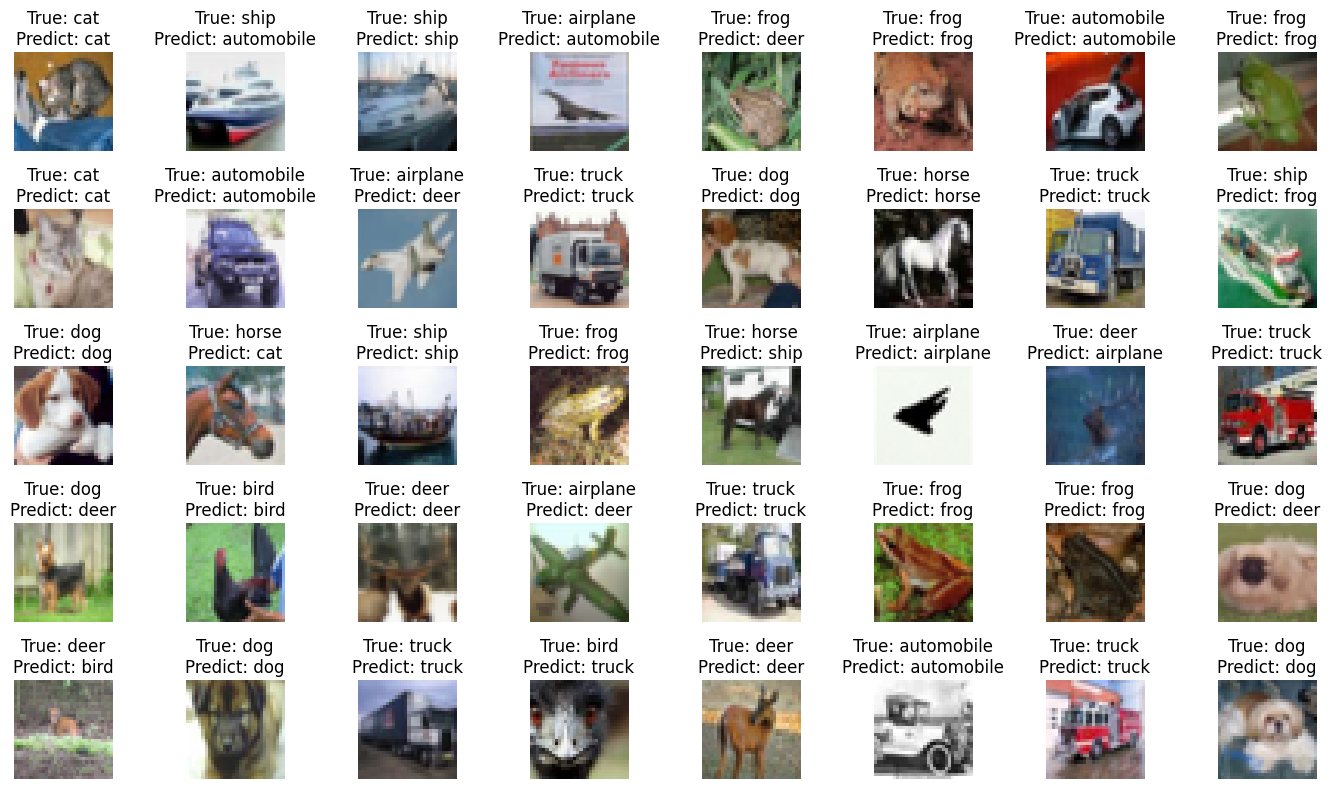

In [ ]:
print("Image Prediction")
image_evaluation(LeNet5, classes, X_test, y_test)

# **AlexNet* (modified)**

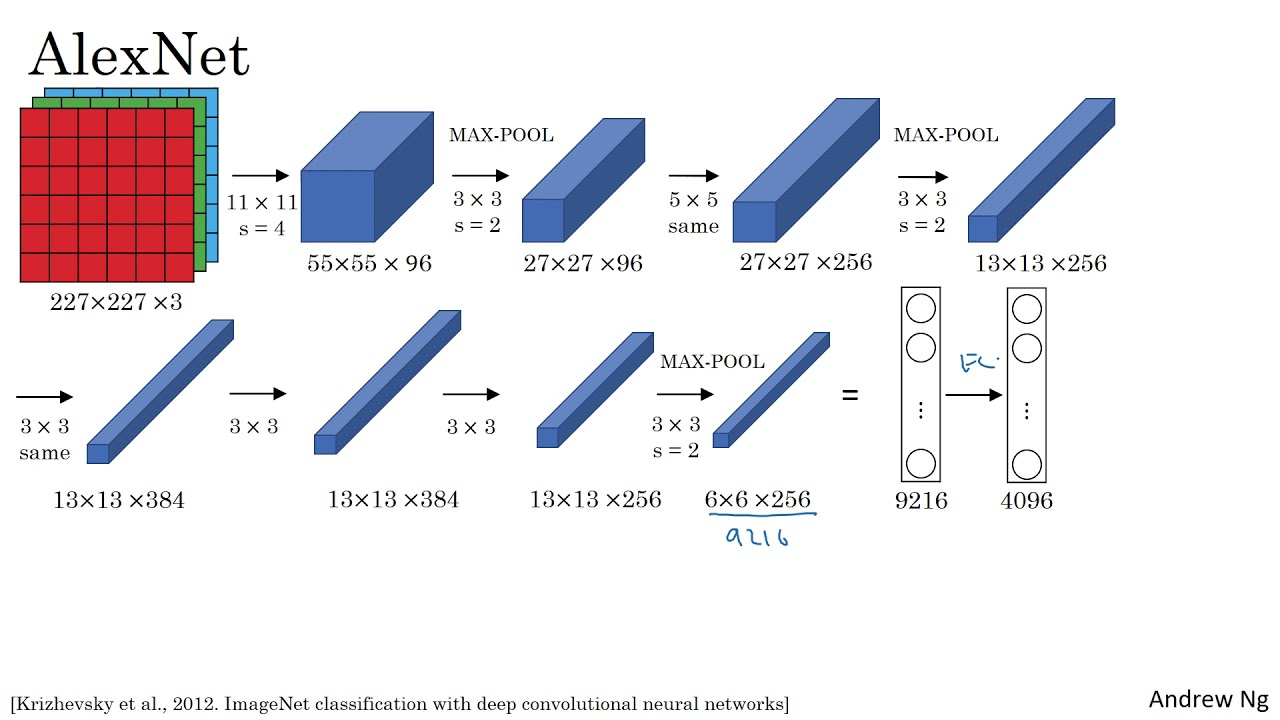

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 8, 8, 96)          2688      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 96)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 384)         885120    
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 384)        

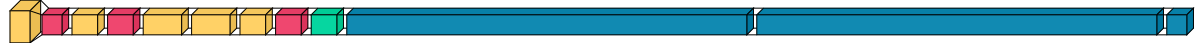

In [ ]:
AlexNet = Sequential([
    Conv2D(96, kernel_size=(3, 3), strides=4, activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(10, activation='softmax')  # Adjust the output size for your dataset
])


AlexNet.summary()
visualkeras.layered_view(AlexNet)

In [ ]:
# Compile the model
AlexNet.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=metrics)


In [ ]:


history = AlexNet.fit(
    X_train,
    y_train_cat,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test_cat),
    callbacks=[early_stopping]
)

Epoch 1/100
782/782 [==============================] - 16s 15ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/100
782/782 [==============================] - 11s 14ms/step - loss: 2.2397 - accuracy: 0.1229 - val_loss: 1.8868 - val_accuracy: 0.2370
Epoch 3/100
782/782 [==============================] - 11s 14ms/step - loss: 1.7874 - accuracy: 0.2800 - val_loss: 1.7182 - val_accuracy: 0.3145
Epoch 4/100
782/782 [==============================] - 11s 14ms/step - loss: 1.6570 - accuracy: 0.3495 - val_loss: 1.6131 - val_accuracy: 0.3789
Epoch 5/100
782/782 [==============================] - 11s 14ms/step - loss: 1.5129 - accuracy: 0.4337 - val_loss: 1.4859 - val_accuracy: 0.4560
Epoch 6/100
782/782 [==============================] - 11s 14ms/step - loss: 1.3734 - accuracy: 0.4977 - val_loss: 1.4010 - val_accuracy: 0.4906
Epoch 7/100
782/782 [==============================] - 11s 14ms/step - loss: 1.2722 - accuracy: 0.5369 - val_loss: 1.3665 - val_ac

<Figure size 300x200 with 0 Axes>

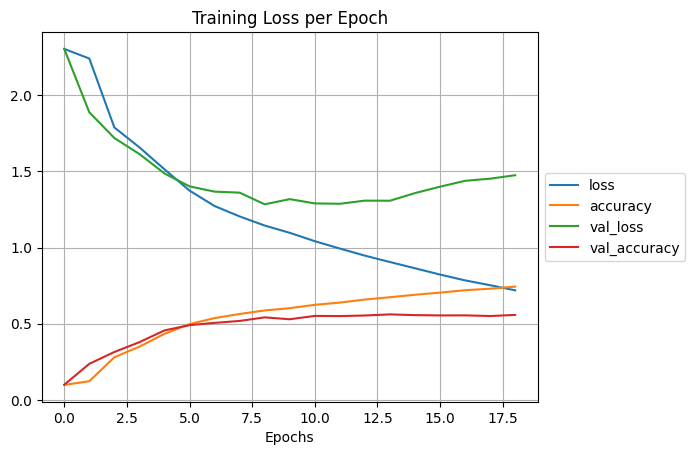

In [ ]:
history_AlexNet = pd.DataFrame(AlexNet.history.history)
plt.figure(figsize=(3, 2))
history_AlexNet.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Image Prediction
313/313 [==============================] - 1s 3ms/step


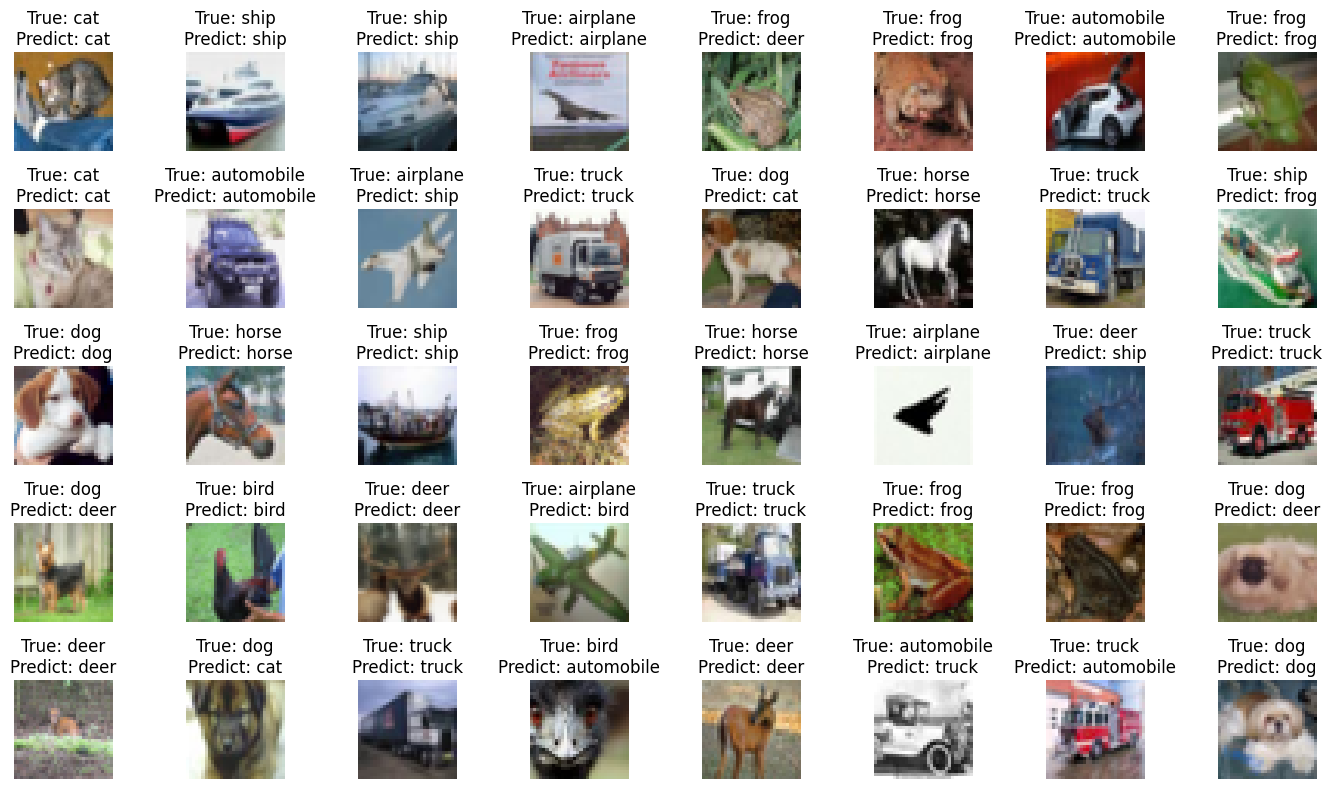

In [ ]:
print("Image Prediction")
image_evaluation(AlexNet, classes, X_test, y_test)

# **Pretrained model (Transfer Learning)**

## **VGG16**

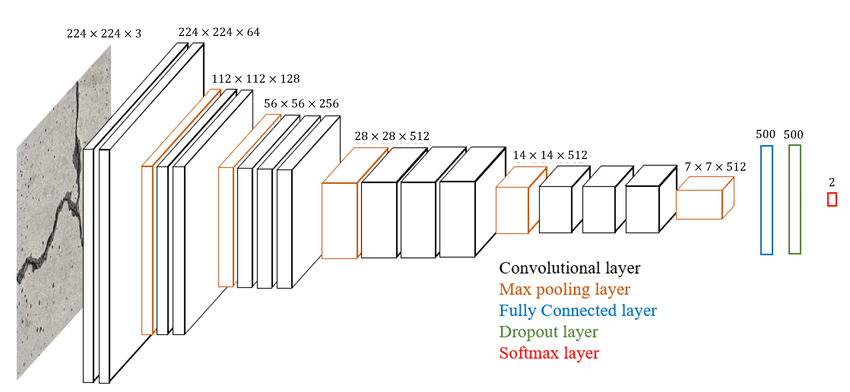

Epoch 1/100
782/782 [==============================] - 13s 15ms/step - loss: 1.5188 - accuracy: 0.4662 - val_loss: 1.2991 - val_accuracy: 0.5473
Epoch 2/100
782/782 [==============================] - 11s 15ms/step - loss: 1.3034 - accuracy: 0.5422 - val_loss: 1.2210 - val_accuracy: 0.5725
Epoch 3/100
782/782 [==============================] - 10s 13ms/step - loss: 1.2438 - accuracy: 0.5631 - val_loss: 1.1942 - val_accuracy: 0.5831
Epoch 4/100
782/782 [==============================] - 11s 14ms/step - loss: 1.2087 - accuracy: 0.5756 - val_loss: 1.1696 - val_accuracy: 0.5889
Epoch 5/100
782/782 [==============================] - 11s 14ms/step - loss: 1.1833 - accuracy: 0.5857 - val_loss: 1.1633 - val_accuracy: 0.5930
Epoch 6/100
782/782 [==============================] - 10s 13ms/step - loss: 1.1637 - accuracy: 0.5954 - val_loss: 1.1436 - val_accuracy: 0.5967
Epoch 7/100
782/782 [==============================] - 10s 13ms/step - loss: 1.1448 - accuracy: 0.5995 - val_loss: 1.1324 - val_ac

<Figure size 300x200 with 0 Axes>

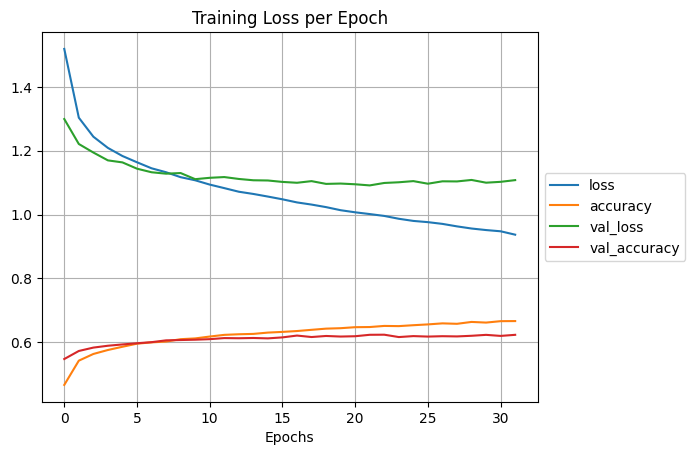

313/313 - 2s - loss: 1.1078 - accuracy: 0.6231 - 2s/epoch - 8ms/step
Test accuracy: 0.6230999827384949
Image Prediction
313/313 [==============================] - 2s 7ms/step


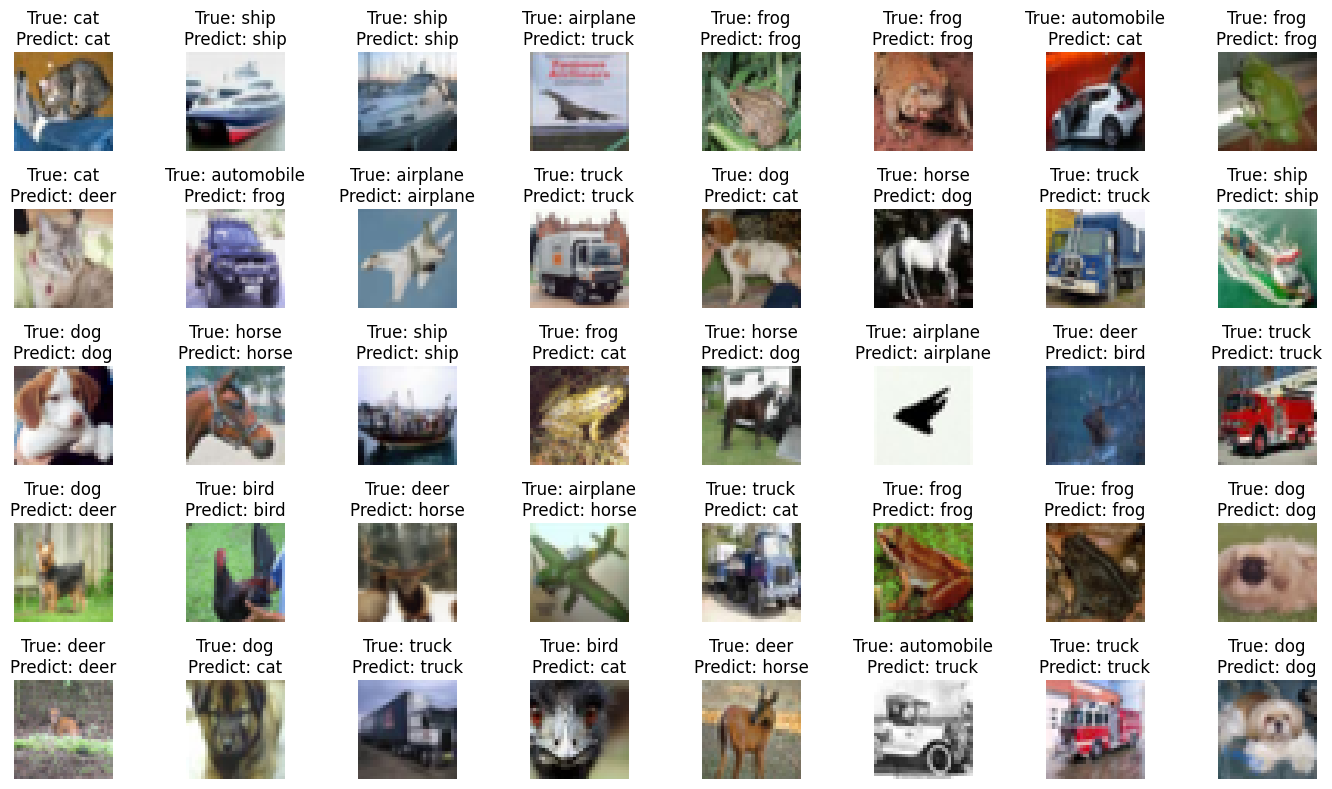

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

base_model.trainable = False

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)
history = pd.DataFrame(model.history.history)
plt.figure(figsize=(3, 2))
history.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

print("Image Prediction")
image_evaluation(model, classes, X_test, y_test)





58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
782/782 [==============================] - 47s 38ms/step - loss: 1.8071 - accuracy: 0.2779 - val_loss: 1.4568 - val_accuracy: 0.4133
Epoch 2/10
782/782 [==============================] - 27s 35ms/step - loss: 1.3272 - accuracy: 0.4970 - val_loss: 1.1858 - val_accuracy: 0.5825
Epoch 3/10
782/782 [==============================] - 29s 37ms/step - loss: 1.0383 - accuracy: 0.6363 - val_loss: 0.9801 - val_accuracy: 0.6665
Epoch 4/10
782/782 [==============================] - 28s 35ms/step - loss: 0.8380 - accuracy: 0.7109 - val_loss: 0.8380 - val_accuracy: 0.7222
Epoch 5/10
782/782 [==============================] - 29s 37ms/step - loss: 0.7025 - accuracy: 0.7623 - val_loss: 0.7563 - val_accuracy: 0.7562
Epoch 6/10
782/782 [==============================] - 28s 35ms/step - loss: 0.6000 - accuracy: 0.7994 - val_loss: 0.7420 - val_accuracy: 0.7648
Epoch 7/10
782/782 [==============================] - 28s 36ms/step - l

<Figure size 300x200 with 0 Axes>

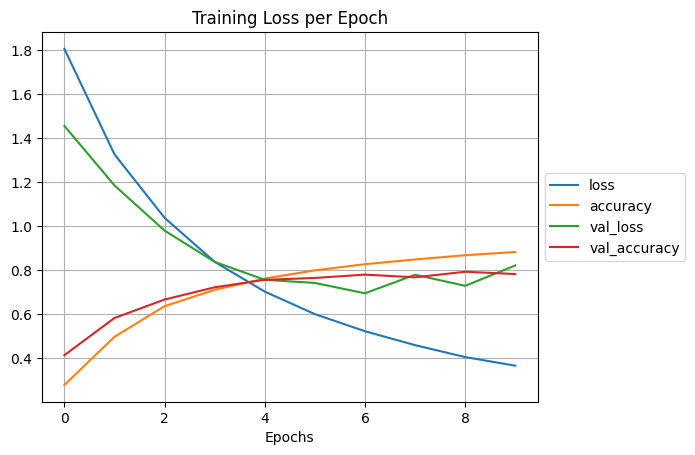

313/313 - 3s - loss: 0.8216 - accuracy: 0.7826 - 3s/epoch - 8ms/step
Test accuracy: 0.7825999855995178
Image Prediction
313/313 [==============================] - 2s 7ms/step


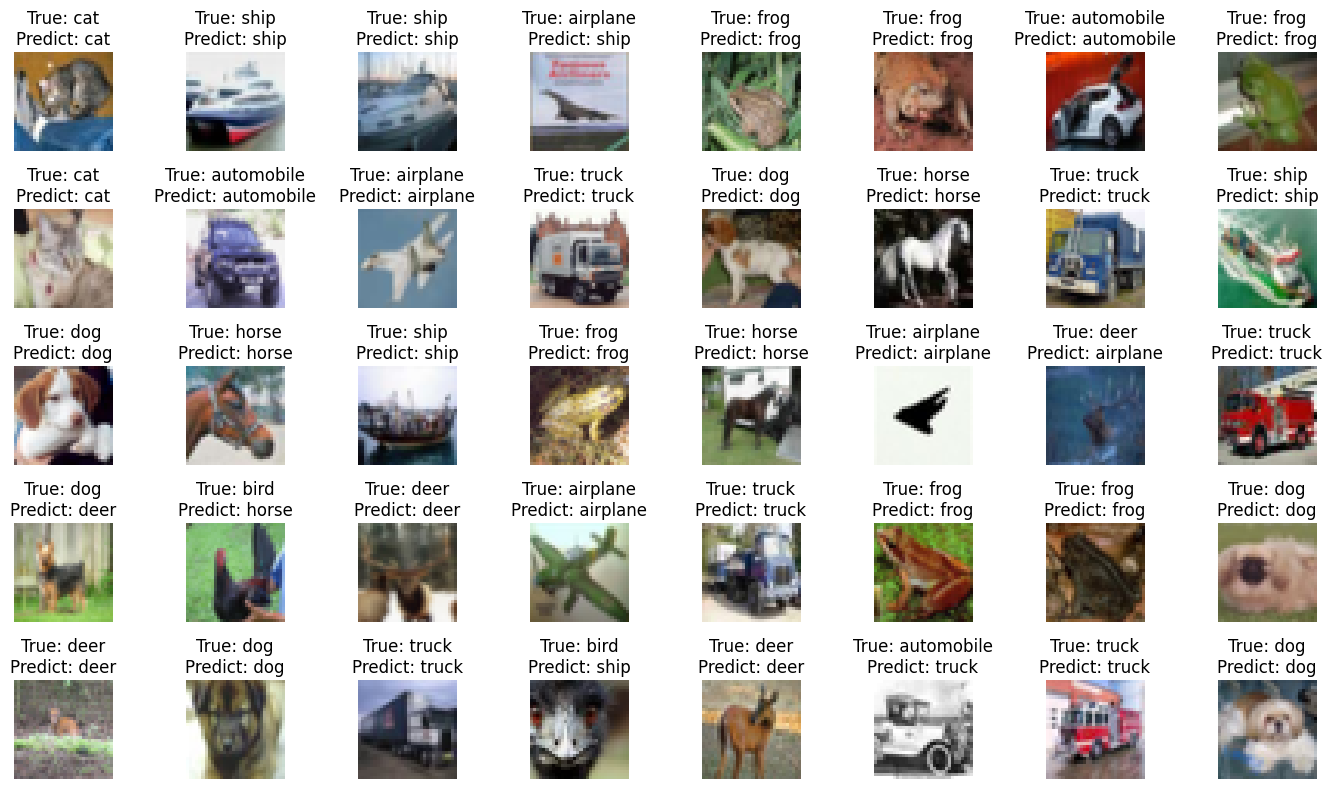

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

#base_model.trainable = False

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64,epochs=10,
                    validation_data=(X_test, y_test))
history = pd.DataFrame(model.history.history)
plt.figure(figsize=(3, 2))
history.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

print("Image Prediction")
image_evaluation(model, classes, X_test, y_test)